<a href="https://colab.research.google.com/github/NandaAbhilash/CN6005/blob/main/CN6005Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten labels (since CIFAR labels are shape (n,1))
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
# CNN with pooling
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_pool = Model(inputs, outputs)

model_pool.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_pool = model_pool.fit(X_train, y_train, epochs=10,
                              validation_split=0.1, batch_size=64)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 82ms/step - accuracy: 0.3232 - loss: 1.8155 - val_accuracy: 0.5182 - val_loss: 1.3000
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.5500 - loss: 1.2556 - val_accuracy: 0.6044 - val_loss: 1.1147
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.6261 - loss: 1.0633 - val_accuracy: 0.6644 - val_loss: 0.9735
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.6674 - loss: 0.9430 - val_accuracy: 0.6632 - val_loss: 0.9618
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.7039 - loss: 0.8476 - val_accuracy: 0.6902 - val_loss: 0.8930
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.7320 - loss: 0.7749 - val_accuracy: 0.6964 - val_loss: 0.8609
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.7480 - loss: 0.7099 - val_accuracy: 0.7244 - val_loss: 0.7914
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.7765 - loss: 0.6411 - 

In [10]:
# CNN without pooling
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), strides=(2,2), activation='relu')(inputs)  # stride instead of pooling
x = layers.Conv2D(64, (3, 3), strides=(2,2), activation='relu')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_no_pool = Model(inputs, outputs)

model_no_pool.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_no_pool = model_no_pool.fit(X_train, y_train, epochs=10,
                                    validation_split=0.1, batch_size=64)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.3309 - loss: 1.8057 - val_accuracy: 0.5136 - val_loss: 1.3723
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.5311 - loss: 1.3129 - val_accuracy: 0.5836 - val_loss: 1.1716
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6050 - loss: 1.1154 - val_accuracy: 0.6156 - val_loss: 1.1001
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6543 - loss: 0.9911 - val_accuracy: 0.6488 - val_loss: 1.0026
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6958 - loss: 0.8719 - val_accuracy: 0.6618 - val_loss: 0.9923
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.7238 - loss: 0.7898 - val_accuracy: 0.6352 - val_loss: 1.0601
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.7478 - loss: 0.7199 - val_accuracy: 0.6938 - val_loss: 0.9171
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.7784 - loss: 0.6407 - 

In [11]:
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


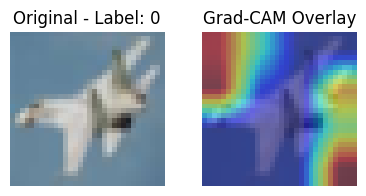

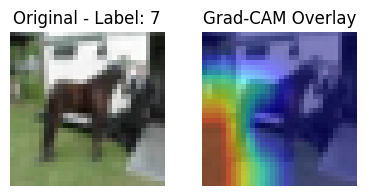

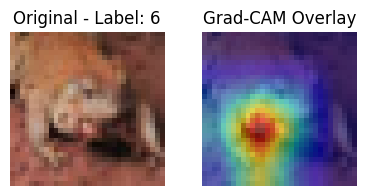

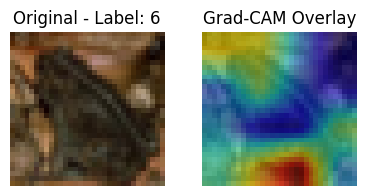

In [12]:
# Pick some test images
image_index = [10, 20, 5, 30]
for i in image_index:
    image = X_test[i]
    label = y_test[i]
    heatmap = compute_gradcam(model_pool, image, label)

    # Resize heatmap to match input image
    heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [32, 32]).numpy().squeeze()

    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original - Label: {label}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.title("Grad-CAM Overlay")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
